In [1]:
import pandas as pd

In [2]:
attacks_df = pd.read_excel("https://www.sharkattackfile.net/spreadsheets/GSAF5.xls")

In [3]:
attacks_df.head(2)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
attacks_df.shape

(6973, 23)

In [5]:
attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6972 non-null   object 
 1   Year            6968 non-null   float64
 2   Type            6952 non-null   object 
 3   Country         6920 non-null   object 
 4   State           6488 non-null   object 
 5   Location        6405 non-null   object 
 6   Activity        6384 non-null   object 
 7   Name            6750 non-null   object 
 8   Sex             6391 non-null   object 
 9   Age             3975 non-null   object 
 10  Injury          6935 non-null   object 
 11  Unnamed: 11     6408 non-null   object 
 12  Time            3443 non-null   object 
 13  Species         3838 non-null   object 
 14  Source          6951 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [6]:
columns = list(attacks_df)

for column in columns:
    print(f"{column} column has {attacks_df[column].nunique()} unique values")

Date column has 6023 unique values
Year column has 261 unique values
Type column has 12 unique values
Country column has 234 unique values
State column has 914 unique values
Location column has 4534 unique values
Activity column has 1596 unique values
Name column has 5708 unique values
Sex column has 8 unique values
Age column has 245 unique values
Injury column has 4100 unique values
Unnamed: 11 column has 12 unique values
Time column has 423 unique values
Species  column has 1693 unique values
Source column has 5326 unique values
pdf column has 6789 unique values
href formula column has 6784 unique values
href column has 6776 unique values
Case Number column has 6777 unique values
Case Number.1 column has 6775 unique values
original order column has 6797 unique values
Unnamed: 21 column has 1 unique values
Unnamed: 22 column has 2 unique values


In [7]:
for column in columns:
    print(attacks_df[column].value_counts(),"\n")

Date
1957                    9
1942                    8
1958                    7
1941                    6
No date                 6
                       ..
13-Aug-2000             1
15-Aug-2000             1
21-Aug-2000             1
Reported 27-Aug-2000    1
1845-1853               1
Name: count, Length: 6023, dtype: int64 

Year
2015.0    143
2017.0    139
2016.0    131
0.0       129
2011.0    128
         ... 
1785.0      1
1784.0      1
1783.0      1
1780.0      1
1822.0      1
Name: count, Length: 261, dtype: int64 

Type
Unprovoked             5132
Provoked                636
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64 

Country
USA                   2550
AUSTRALIA             1481
SOUTH AFRICA           597
NEW ZEALA

In [8]:
# Buscamos filas duplicadas
attacks_df.duplicated().sum()

1

In [9]:
# Eliminamos filas duplicadas
attacks_df = attacks_df.drop_duplicates()

In [10]:
attacks_df.shape

(6972, 23)

In [11]:
attacks_df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [12]:
attacks_df.Name.duplicated().sum()

1263

In [13]:
# Quitar las columnas que no nos interesan
clean_df = attacks_df.drop(columns = ['Location', 'Sex', 'Age', 'Unnamed: 11', 'Time', 'Species ', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'])

In [14]:
clean_df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Activity', 'Name',
       'Injury'],
      dtype='object')

In [15]:
# Quitamos también Name porque hemos visto que sus datos no son relevantes, hay mucho male y female
clean_df = clean_df.drop(columns = ['Name'])

In [16]:
clean_df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Activity', 'Injury'], dtype='object')

In [17]:
clean_df.shape

(6972, 7)

In [18]:
clean_df.head(5)

,Date,Year,Type,Country,State,Activity,Injury
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,y,NaN,NaN,NaN,NaN,NaN,NaN
2,x,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-16 00:00:00,2024.0,Unprovoked,Morocco,Southern Morocco,Swimming - jumped off yacht,Leg severed
4,2024-08-26 00:00:00,2024.0,Unprovoked,Jamaica,Montego Bay,Spearfishing,Head right arm and leg severed


In [19]:
# Quitamos las filas que tienen más de 3 NaNs
clean_df = clean_df.dropna(thresh = 4)
clean_df

,Date,Year,Type,Country,State,Activity,Injury
3,2024-09-16 00:00:00,2024.0,Unprovoked,Morocco,Southern Morocco,Swimming - jumped off yacht,Leg severed
4,2024-08-26 00:00:00,2024.0,Unprovoked,Jamaica,Montego Bay,Spearfishing,Head right arm and leg severed
5,2024-08-06 00:00:00,2024.0,Unprovoked,Belize,Gulf of Honduras,Swimming - Diving,Right lower leg amputated after serious bite
6,2024-07-23 00:00:00,2024.0,Unprovoked,Australia,NSW,Surfing,Serious injury to leg
7,2024-07-18 00:00:00,2024.0,Unprovoked,Australia,Western Australia,Surfing,Minor injury to lower left leg
...,...,...,...,...,...,...,...
6968,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,FATAL
6969,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,FATAL
6970,1900-1905,0.0,Unprovoked,USA,North Carolina,Swimming,FATAL
6971,1883-1889,0.0,Unprovoked,PANAMA,NaN,NaN,FATAL


In [20]:
# Comprobamos cuantos nan hay en cada columna
clean_df.isna().sum()

Date          0
Year          2
Type         18
Country      49
State       481
Activity    585
Injury       34
dtype: int64

In [21]:
# Ponemos los titulos de las columnas en minuscula
clean_df.columns = [column.lower() for column in clean_df.columns]

In [22]:
# Vemos que falta el año pero se puede sacar de la columna date
clean_df[clean_df.year.isnull()]

,date,year,type,country,state,activity,injury
830,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,Spearfishing,"No attack, shark made a threat display"
6742,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Swimming,FATAL


In [23]:
clean_df.type.value_counts()

type
Unprovoked             5130
Provoked                636
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [24]:
clean_df[clean_df.type.isnull()]

,date,year,type,country,state,activity,injury
220,01-Apr-2022,2022.0,NaN,SOUTH AFRICA,KZN,NaN,Possible drowing and scavenging
236,08-Feb-2022,2022.0,NaN,COSTA RICA,Guanacoste,Diving,Right forearm and left hand injured
257,16-Oct-2021,2021.0,NaN,AUSTRALIA,Queensland,Spearfishing,Disappeared
262,10-Sep-2021,2021.0,NaN,EGYPT,NaN,Swimming,Laceration to arm caused by metal object
283,21-Jul-2021,2021.0,NaN,USA,Florida,NaN,"Small laceration to ankle, shark involvement n..."
371,21-Oct-2020,2020.0,NaN,USA,North Carolina,Surfing,Laceration to knee and foot
376,21-Sep-2020,2020.0,NaN,USA,Hawaii,Swimming,Lacerations and puncture wounds to shoulder
380,16-Sep-2020,2020.0,NaN,USA,Florida,Swimming,Minor cuts and punctures to left foot
383,08-Sep-2020,2020.0,NaN,USA,Florida,Surf fishing,Hand bitten that was holding a fish PROVOKED I...
393,19-Aug-2020,2020.0,NaN,USA,South Carolina,Wading,Minor injury to arm by a fish


In [25]:
# Rellenamos los nans de type con Unknown
clean_df.type = clean_df.type.fillna("Unknown")

In [26]:
clean_df.isna().sum()

date          0
year          2
type          0
country      49
state       481
activity    585
injury       34
dtype: int64

In [27]:
clean_df.type = clean_df.type.replace(["?", "Unconfirmed", "Unverified", "Under investigation"], "Unknown")

In [28]:
clean_df.type.value_counts()

type
Unprovoked      5130
Provoked         636
Invalid          552
Watercraft       355
Sea Disaster     242
Questionable      22
Unknown           22
Boat               7
 Provoked          2
Name: count, dtype: int64

In [29]:
clean_df.type = clean_df.type.replace(" Provoked", "Provoked")

In [30]:
clean_df.type.value_counts()

type
Unprovoked      5130
Provoked         638
Invalid          552
Watercraft       355
Sea Disaster     242
Questionable      22
Unknown           22
Boat               7
Name: count, dtype: int64

In [31]:
clean_df.isna().sum()

date          0
year          2
type          0
country      49
state       481
activity    585
injury       34
dtype: int64

In [32]:
#Hasta aquí visto en grupo

In [33]:
clean_df.country.nunique()

234

In [34]:
#Casteamos la columna country en str
clean_df.country = clean_df.country.astype(str)

In [35]:
# pasamos los datos a minusculas
clean_df.country = clean_df.country.apply(lambda x: x.lower().strip())

In [36]:
clean_df.country.nunique()

211

In [37]:
list(clean_df.country.sort_values().unique())

['admiralty islands',
 'africa',
 'algeria',
 'american samoa',
 'andaman / nicobar islandas',
 'andaman islands',
 'angola',
 'antigua',
 'argentina',
 'aruba',
 'asia?',
 'atlantic ocean',
 'australia',
 'azores',
 'bahamas',
 'bahrein',
 'bangladesh',
 'barbados',
 'bay of bengal',
 'belize',
 'bermuda',
 'between portugal & india',
 'brazil',
 'british isles',
 'british new guinea',
 'british overseas territory',
 'british virgin islands',
 'british west indies',
 'burma',
 'canada',
 'cape verde',
 'caribbean sea',
 'cayman islands',
 'central pacific',
 'ceylon',
 'ceylon (sri lanka)',
 'chile',
 'china',
 'coast of africa',
 'colombia',
 'columbia',
 'comoros',
 'cook islands',
 'coral sea',
 'costa rica',
 'crete',
 'croatia',
 'cuba',
 'curacao',
 'cyprus',
 'diego garcia',
 'djibouti',
 'dominican republic',
 'ecuador',
 'egypt',
 'egypt / israel',
 'el salvador',
 'england',
 'equatorial guinea / cameroon',
 'falkland islands',
 'federated states of micronesia',
 'fiji',
 'f

In [38]:
cl2 = clean_df[clean_df.year.isnull()]
cl2

,date,year,type,country,state,activity,injury
830,Reported 08-Jan-2017,NaN,Invalid,australia,Queensland,Spearfishing,"No attack, shark made a threat display"
6742,Reported 19-Aug-1836,NaN,Unprovoked,england,Cumberland,Swimming,FATAL


In [39]:
# separamos el año de date y lo pasamos a year
clean_df.year = clean_df.year.fillna(cl2.date.apply(lambda x: x.split("-")[2]))

In [40]:
clean_df.isna().sum()

date          0
year          0
type          0
country       0
state       481
activity    585
injury       34
dtype: int64

In [41]:
#echamos un vistazo rápido a los valores de year 
list(clean_df.year.unique())

[2024.0,
 2026.0,
 2025.0,
 2023.0,
 2022.0,
 2021.0,
 2020.0,
 2019.0,
 2018.0,
 2017.0,
 '2017',
 2016.0,
 2015.0,
 2014.0,
 2013.0,
 2012.0,
 2011.0,
 2010.0,
 2009.0,
 2008.0,
 2007.0,
 2006.0,
 2005.0,
 2004.0,
 2003.0,
 2002.0,
 2001.0,
 2000.0,
 1999.0,
 1998.0,
 1997.0,
 1996.0,
 1995.0,
 1984.0,
 1994.0,
 1993.0,
 1992.0,
 1991.0,
 1990.0,
 1989.0,
 1969.0,
 1988.0,
 1987.0,
 1986.0,
 1985.0,
 1983.0,
 1982.0,
 1981.0,
 1980.0,
 1979.0,
 1978.0,
 1977.0,
 1976.0,
 1975.0,
 1974.0,
 1973.0,
 1972.0,
 1971.0,
 1970.0,
 1968.0,
 1967.0,
 1966.0,
 1965.0,
 1964.0,
 1963.0,
 1962.0,
 1961.0,
 1960.0,
 1959.0,
 1958.0,
 1957.0,
 1956.0,
 1955.0,
 1954.0,
 1953.0,
 1952.0,
 1951.0,
 1950.0,
 1949.0,
 1948.0,
 1848.0,
 1947.0,
 1946.0,
 1945.0,
 1944.0,
 1943.0,
 1942.0,
 1941.0,
 1940.0,
 1939.0,
 1938.0,
 1937.0,
 1936.0,
 1935.0,
 1934.0,
 1933.0,
 1932.0,
 1931.0,
 1930.0,
 1929.0,
 1928.0,
 1927.0,
 1926.0,
 1925.0,
 1924.0,
 1923.0,
 1922.0,
 1921.0,
 1920.0,
 1919.0,
 1918.0,
 

In [42]:
#Casteamo year a int
clean_df.year = clean_df.year.astype(int)

In [43]:
#Filtramos para quedarnos solo con los ataques posteriores a 1990
clean_df = clean_df[clean_df.year > 1990]

In [44]:
clean_df.isna().sum()

date          0
year          0
type          0
country       0
state       135
activity    160
injury       10
dtype: int64

In [45]:
clean_df.country.nunique()

116

In [46]:
list(clean_df.country.sort_values().unique())

['angola',
 'antigua',
 'argentina',
 'aruba',
 'atlantic ocean',
 'australia',
 'azores',
 'bahamas',
 'belize',
 'brazil',
 'british overseas territory',
 'british virgin islands',
 'canada',
 'cape verde',
 'caribbean sea',
 'cayman islands',
 'chile',
 'china',
 'colombia',
 'columbia',
 'comoros',
 'coral sea',
 'costa rica',
 'croatia',
 'cuba',
 'diego garcia',
 'dominican republic',
 'ecuador',
 'egypt',
 'egypt / israel',
 'el salvador',
 'england',
 'fiji',
 'france',
 'french polynesia',
 'grand cayman',
 'greece',
 'guam',
 'gulf of aden',
 'honduras',
 'hong kong',
 'india',
 'indonesia',
 'ireland',
 'israel',
 'italy',
 'jamaica',
 'japan',
 'jordan',
 'kenya',
 'kiribati',
 'liberia',
 'libya',
 'madagascar',
 'malaysia',
 'maldive islands',
 'maldives',
 'malta',
 'marshall islands',
 'mauritius',
 'mexico',
 'micronesia',
 'morocco',
 'mozambique',
 'nan',
 'nevis',
 'new caledonia',
 'new zealand',
 'nigeria',
 'northern arabian sea',
 'norway',
 'okinawa',
 'palesti

In [47]:
#Numero de actividades unicas
clean_df.activity.nunique()

477

In [48]:
# Rellenamos los 160 nans de activity con Unknown
clean_df.activity = clean_df.activity.fillna("Unknown")

C:\Users\FernandoSanz-Extreme\AppData\Local\Temp\ipykernel_36556\3491672707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.activity = clean_df.activity.fillna("Unknown")


In [49]:
clean_df.activity.value_counts()

activity
Surfing                           927
Swimming                          452
Spearfishing                      198
Fishing                           190
Unknown                           163
                                 ... 
Swimming or Snorkeling              1
Standing, collecting sea stars      1
Jumping in the waves                1
Diving, photographing sharks        1
Surfing (or sailboarding)           1
Name: count, Length: 477, dtype: int64

In [50]:
#Pasamos a minusculas y quitamos espacios al principio y final
clean_df.activity = clean_df.activity.apply(lambda x: x.lower().strip())
clean_df.activity.value_counts()

C:\Users\FernandoSanz-Extreme\AppData\Local\Temp\ipykernel_36556\1833973008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.activity = clean_df.activity.apply(lambda x: x.lower().strip())


activity
surfing                                               931
swimming                                              464
fishing                                               200
spearfishing                                          198
unknown                                               163
                                                     ... 
jumping in the waves                                    1
diving, photographing sharks                            1
fishing (illegally)                                     1
attempting to kite surf from egypt to saudi arabia      1
surfing (or sailboarding)                               1
Name: count, Length: 448, dtype: int64

In [51]:
clean_df.activity.str.contains("surfing").sum()

1031

In [52]:
clean_df.activity.str.contains("swimming").sum()

525

In [53]:
clean_df.activity.str.contains("fishing").sum()

516

In [54]:
clean_df.activity.str.contains("spearfishing").sum()

220

In [287]:
test_df = clean_df.copy()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3252 entries, 3 to 3256
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      3252 non-null   object
 1   year      3252 non-null   int32 
 2   type      3252 non-null   object
 3   country   3252 non-null   object
 4   state     3117 non-null   object
 5   activity  3252 non-null   object
 6   injury    3242 non-null   object
dtypes: int32(1), object(6)
memory usage: 190.5+ KB


In [289]:
test_df.activity.value_counts()

activity
surfing                                               931
swimming                                              464
fishing                                               200
spearfishing                                          198
unknown                                               163
                                                     ... 
jumping in the waves                                    1
diving, photographing sharks                            1
fishing (illegally)                                     1
attempting to kite surf from egypt to saudi arabia      1
surfing (or sailboarding)                               1
Name: count, Length: 448, dtype: int64

In [291]:
test_df.activity = test_df.activity.str.replace(".*surfing*", "surfing", regex = True)

In [297]:
test_df.activity.value_counts()

activity
surfing                                1102
swimming                                592
fishing                                 504
diving                                  203
unknown                                 163
                                       ... 
kayaking or wave skiing                   1
military ocean training                   1
casting a net                             1
kneeling in the water                     1
preparing to fish for jack-mackerel       1
Name: count, Length: 117, dtype: int64

In [393]:
test_df.activity = test_df.activity.str.replace(".*surf.*", "surfing", regex = True)
test_df.activity = test_df.activity.str.replace(".*swim+ing.*", "swimming", regex = True)
test_df.activity = test_df.activity.str.replace(".*fishing.*", "fishing", regex = True)
test_df.activity = test_df.activity.str.replace(".*spearfishing.*", "spearfishing", regex = True)
test_df.activity = test_df.activity.str.replace(".*div.*", "diving", regex = True)
test_df.activity = test_df.activity.str.replace(".*body.boarding.*", "bodyboarding", regex = True)
test_df.activity = test_df.activity.str.replace(".*bo.gie boarding.*", "boogie boarding", regex = True)
test_df.activity = test_df.activity.str.replace(".*snorkel.*", "snorkeling", regex = True)
test_df.activity = test_df.activity.str.replace(".*film.*", "filming", regex = True)
test_df.activity = test_df.activity.str.replace(".*photo.*", "photographing", regex = True)
test_df.activity = test_df.activity.str.replace(".*shark.*", "shark related activities", regex = True)
test_df.activity = test_df.activity.str.replace(".*play.*", "playing", regex = True)
test_df.activity = test_df.activity.str.replace(".*float.*", "floating", regex = True)
test_df.activity = test_df.activity.str.replace(".*paddl.*", "paddleboarding", regex = True)
test_df.activity = test_df.activity.str.replace(".*fell.*", "swimming", regex = True)
test_df.activity = test_df.activity.str.replace(".*jump.*", "swimming", regex = True)
test_df.activity = test_df.activity.str.replace(".*stand.*", "swimming", regex = True)
test_df.activity.value_counts()

activity
surfing                                1102
swimming                                592
fishing                                 504
diving                                  203
unknown                                 163
                                       ... 
kayaking or wave skiing                   1
military ocean training                   1
casting a net                             1
kneeling in the water                     1
preparing to fish for jack-mackerel       1
Name: count, Length: 117, dtype: int64

In [395]:
#Lista de actividades
list(test_df.activity.sort_values().unique())

['',
 '"riding waves on a board"',
 '2 boats capsized',
 'adrift in a life jacket',
 'adrift on refugee raft',
 'air disaster',
 'air disaster - piper aircraft crashed into the sea, killing all on board',
 'air disaster. flash airlines boeing 737 crashed into the red sea',
 'attempting to attract dolphins',
 'attempting to catch a crocodile',
 'attempting to fix motor',
 'attempting to illegally enter the usa',
 'attempting to retreive a dinghy',
 'bathing',
 'batin',
 'bodyboarding',
 'boeing 757 enroute from porta plata plunged into the sea',
 'boogie boarding',
 'canoe with 3 men onboard sank',
 'canoeing',
 'casting a net',
 'cleaning fish',
 'collecting beche-de-mer',
 'competing in the woodvale atlantic rowing race',
 'conducting research',
 'crabbing',
 'crawling',
 "crouching in 2' of water",
 'cruising',
 'diving',
 'feeding fish',
 'feeding stingrays?',
 'fihing',
 'filming',
 'fisherman',
 'fishing',
 'floating',
 'foil boarding',
 'foil-boarding',
 'foilboarding',
 'hiking 

In [391]:
#Buscador de actividades:
list(test_df[test_df.activity.str.contains("wading")].activity.sort_values().unique())

['boogie boarding / wading',
 'fishing / wading',
 'splashing / wading',
 'surf fishing / wading',
 'surfing / wading',
 'swimming / wading',
 'wading',
 'wading / fishing & carrying a bag of fish',
 'wading / surfing',
 'wading in school of baitfish',
 'wading near a fishing net',
 'wading or swimming',
 'wading to shore after surfing',
 'wading to shore from his boat',
 'wading with surfboard',
 'wading, when he stepped on the shark',
 'wading?']

In [155]:
#test_df[test_df["activity"] == "shark related activities"]

In [305]:
test_df.activity.sort_values().nunique()

117

In [ ]:
# Hasta aquí visto con Lau

In [319]:
test2_df = test_df.copy()
test2_df.head()

,date,year,type,country,state,activity,injury
3,2024-09-16 00:00:00,2024,Unprovoked,morocco,Southern Morocco,swimming - jumped off yacht,Leg severed
4,2024-08-26 00:00:00,2024,Unprovoked,jamaica,Montego Bay,spearfishing,Head right arm and leg severed
5,2024-08-06 00:00:00,2024,Unprovoked,belize,Gulf of Honduras,swimming - diving,Right lower leg amputated after serious bite
6,2024-07-23 00:00:00,2024,Unprovoked,australia,NSW,surfing,Serious injury to leg
7,2024-07-18 00:00:00,2024,Unprovoked,australia,Western Australia,surfing,Minor injury to lower left leg


In [363]:
test2_df.country = test2_df.country.replace("columbia", "colombia")
test2_df.country = test_df.country.replace(["french polynesia", "new caledonia", "reunion", "reunion island", "st martin"], "french overseas territories")
test2_df.country = test_df.country.replace(["british overseas territory", "british virgin islands", "cayman islands", "diego garcia", "england", "grand cayman", "scotland", "st helena, british overseas territory", "turks & caicos", "turks and caicos"], "UK (including overseas territories)")
test2_df.country = test2_df.country.replace(["puerto rico", "guam"], "usa")
test2_df.country = test2_df.country.replace(["aruba", "st. maartin"], "netherlands")
test2_df.country = test2_df.country.replace("azores", "portugal")
test2_df.country = test2_df.country.replace("hong kong", "china")
test2_df.country = test2_df.country.replace("coral sea", "australia")
test2_df.country = test2_df.country.replace("okinawa", "japan")
test2_df.country = test2_df.country.replace(["palestinian territories", "egypt / israel"], "israel")
test2_df.country = test2_df.country.replace("united arab emirates (uae)", "united arab emirates")
test2_df.country = test2_df.country.replace("antigua", "Antigua and Barbuda")
test2_df.country = test2_df.country.replace("maldive islands", "maldives")
test2_df.country = test2_df.country.replace("tobago", "Trinidad and Tobago")
test2_df.country = test2_df.country.replace(["nevis", "st kitts / nevis"], "Saint Kitts and Nevis")
test2_df.country = test2_df.country.replace(["atlantic ocean", "caribbean sea", "gulf of aden", "northern arabian sea"], "middle of the ocean")
test2_df.country = test2_df.country.replace("nan", "unknown")

In [ ]:
"british overseas territory", "british virgin islands", "cayman islands", "diego garcia", "england", "grand cayman", "scotland", "st helena, british overseas territory", "turks & caicos", "turks and caicos"

In [365]:
test2_df.country.nunique()

92

In [359]:
test2_df[test2_df["country"] == "nan"]

,date,year,type,country,state,activity,injury


In [367]:
test2_df.country.value_counts()

country
usa             1585
australia        601
south africa     208
brazil           108
bahamas           91
                ... 
st. martin         1
kiribati           1
nigeria            1
saudi arabia       1
angola             1
Name: count, Length: 92, dtype: int64

In [385]:
test2_df.isna().sum()

date          0
year          0
type          0
country       0
state       135
activity      0
injury       10
dtype: int64

In [389]:
test2_df.shape

(3252, 7)

In [399]:
test2_df.activity = test2_df.activity.replace(["kayaking", "paddleboarding", "wakeboarding", "skimboarding", "kiteboarding", "foil boarding"], "other water sports")
test2_df.activity = test2_df.activity.replace(["cleaning fish", "feeding fish", "casting a net", "collecting beche-de-mer", "preparing to fish for jack-mackerel", "removing fish from a trap", "scalloping", "shrimping", "picking opihi"], "other fishing activities")
test2_df.activity = test2_df.activity.replace(["floating", "treading water", "splashing", "walking", "sitting", "kneeling in the water", "crouching in 2' of water", "lying prone in 2' of water", "crawling", "squatting in the water", "watching seals", "watching the sardine run", "sightseeing"], "recreational water activities")
test2_df.activity = test2_df.activity.replace(["playing", "hiking on the beach", "jet skiing", "riding waves on a board", "attempting to attract dolphins", "attempting to catch a crocodile", "attempting to fix motor", "attempting to illegally enter the USA", "attempting to retrieve a dinghy"], "other activities")
test2_df.activity.value_counts()

activity
surfing                           931
swimming                          464
fishing                           200
spearfishing                      198
unknown                           163
                                 ... 
kayaking or wave skiing             1
standing, collecting sea stars      1
jumping in the waves                1
diving, photographing sharks        1
surfing (or sailboarding)           1
Name: count, Length: 418, dtype: int64

In [401]:
test_df.activity.value_counts()

activity
surfing                                1102
swimming                                592
fishing                                 504
diving                                  203
unknown                                 163
                                       ... 
kayaking or wave skiing                   1
military ocean training                   1
casting a net                             1
kneeling in the water                     1
preparing to fish for jack-mackerel       1
Name: count, Length: 117, dtype: int64

In [403]:
len(test_df.activity)

3252

In [405]:
len(test2_df.activity)

3252

In [407]:
test2_df.activity = test_df.activity

In [409]:
test2_df.activity.value_counts()

activity
surfing                                1102
swimming                                592
fishing                                 504
diving                                  203
unknown                                 163
                                       ... 
kayaking or wave skiing                   1
military ocean training                   1
casting a net                             1
kneeling in the water                     1
preparing to fish for jack-mackerel       1
Name: count, Length: 117, dtype: int64

In [439]:
test2_df.activity = test2_df.activity.replace(["kayaking", "paddleboarding", "wakeboarding", "skimboarding", "kiteboarding", "foil boarding"], "other water sports")
test2_df.activity = test2_df.activity.replace(["cleaning fish", "feeding fish", "casting a net", "collecting beche-de-mer", "preparing to fish for jack-mackerel", "removing fish from a trap", "scalloping", "shrimping", "picking opihi"], "other fishing activities")
test2_df.activity = test2_df.activity.replace(["floating", "treading water", "splashing", "walking", "sitting", "kneeling in the water", "crouching in 2' of water", "lying prone in 2' of water", "crawling", "squatting in the water", "watching seals", "watching the sardine run", "sightseeing"], "recreational water activities")
test2_df.activity = test2_df.activity.replace(["playing", "hiking on the beach", "jet skiing", "riding waves on a board", "attempting to attract dolphins", "attempting to catch a crocodile", "attempting to fix motor", "attempting to illegally enter the USA", "attempting to retrieve a dinghy"], "other activities")
test2_df.activity.value_counts()

activity
surfing                                                                     1102
swimming                                                                     592
fishing                                                                      504
diving                                                                       203
unknown                                                                      163
snorkeling                                                                   126
wading                                                                       112
other water sports                                                            81
bodyboarding                                                                  69
recreational water activities                                                 61
boogie boarding                                                               59
shark related activities                                                      50
other activities   

In [421]:
test2_df.activity = test2_df.activity.replace(["sea Disaster", "adrift in a life jacket", "adrift on refugee raft", "rescuing", "swept out to sea by the tsunami", "owing a dead whale out to sea","towing rubber dinghy","air disaster", "2 boats capsized", "boeing 757 incident"], "other activities")

In [441]:
test2_df.activity = test2_df.activity.replace(["kite boarding", "kite-boarding", "foil-boarding", "foilboarding", "kite foiling", "sup foil boarding", "parasailing"], "other water sports")
test2_df.activity = test2_df.activity.replace(["fisherman", "spearishing", "crabbing", "lobstering"], "other fishing activities")
test2_df.activity = test2_df.activity.replace(["bathing", "night bathing", "sup", "sitting in the water", "walking in shallows", "wading to shore from his boat", "wading?", "splashing / wading"], "recreational water activities")
test2_df.activity = test2_df.activity.replace(["air disaster", "air disaster - piper aircraft crashed into the sea", "air disaster. flash airlines boeing 737 crashed into the red sea", "sinking of the 40' esperanza off st. maartin", "shipwreck", "shipwrecked", "the 426-ton cargo ship mia capsized", "sinking of the cargo ship mark jason", "swept out to sea by the tsunami"], "disasters and incidents")
test2_df.activity = test2_df.activity.replace(["murder", "murder victim", "photographing", "filming", "cruising", "yacht race", "sleeping in anchored boat", "attempting to illegally enter the usa", "attempting to retrieve a dinghy", "holding onto an inflatable boat", "rowing an inflatable dinghy", "washing hands", "washing his feet", "washing sand off a speared fish", "riding waves on a board"], "other activities")
test2_df.activity = test2_df.activity.replace(["on a round-the-world expedition", "lifeguard exercises", "lifeguard training exercise", "lifesaving drill", "military ocean training", "scientific research", "conducting research", "competing in the woodvale atlantic rowing race", "transatlantic rowing"], "exploration and training")
test2_df.activity = test2_df.activity.replace(["sailing", "kayaking or wave skiing", "kakaying", "riding waves on a board"], "other water sports")
test2_df.activity = test2_df.activity.replace(["boeing 757 enroute from porta plata plunged into the sea", "sinking of the 40' esperanza off st. maartin with 36 refugees on board", "swept out to sea by the tsunami, she clung to a log for 24 hours", "the 426-ton cargo ship mia, laden with cement, capsized in heavy seas", "air disaster - piper aircraft crashed into the sea, killing all on board", "canoe with 3 men onboard sank"], "disasters and incidents")
test2_df.activity = test2_df.activity.replace(["scientific research (dr. sonny gruber's student)", "attempting to retrieve a dinghy"], "exploration and training")
test2_df.activity = test2_df.activity.replace(["feeding stingrays?", "fihing", "towing a dead whale out to sea"], "other fishing activities")
test2_df.activity = test2_df.activity.replace(["wading in school of baitfish", "batin", "inflatable boat", "stamding"], "recreational water activities")

In [447]:
test2_df.activity.value_counts()

activity
surfing                          1102
swimming                          592
fishing                           504
diving                            203
unknown                           163
snorkeling                        126
wading                            112
other water sports                 85
recreational water activities      82
bodyboarding                       69
boogie boarding                    59
shark related activities           50
other activities                   46
disasters and incidents            27
other fishing activities           19
exploration and training           12
                                    1
Name: count, dtype: int64

In [445]:
test2_df.activity = test2_df.activity.replace(["Disasters and Incidents", "swept out to sea by the tsunami, she clung  to a log for 24 hours", "sea disaster"], "disasters and incidents")
test2_df.activity = test2_df.activity.replace(["rowing", '"riding waves on a board"', "canoeing", "attempting to retreive a dinghy"], "recreational water activities")


In [ ]:
#test2_df.activity = test2_df.activity.replace([], "")

In [451]:
test2_df.activity = test2_df.activity.replace("", "unknown")
test2_df.activity.value_counts()

activity
surfing                          1102
swimming                          592
fishing                           504
diving                            203
unknown                           164
snorkeling                        126
wading                            112
other water sports                 85
recreational water activities      82
bodyboarding                       69
boogie boarding                    59
shark related activities           50
other activities                   46
disasters and incidents            27
other fishing activities           19
exploration and training           12
Name: count, dtype: int64

In [580]:
test3_df = test2_df.copy()

In [582]:
test3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3252 entries, 3 to 3256
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      3252 non-null   object
 1   year      3252 non-null   int32 
 2   type      3252 non-null   object
 3   country   3252 non-null   object
 4   state     3117 non-null   object
 5   activity  3252 non-null   object
 6   injury    3242 non-null   object
dtypes: int32(1), object(6)
memory usage: 190.5+ KB


In [584]:
test3_df.isna().sum()

date          0
year          0
type          0
country       0
state       135
activity      0
injury       10
dtype: int64

In [586]:
test3_df.injury = test3_df.injury.fillna("Unknown")
test3_df.isna().sum()

date          0
year          0
type          0
country       0
state       135
activity      0
injury        0
dtype: int64

In [588]:
# pasamos los datos a minusculas
test3_df.injury = test3_df.injury.apply(lambda x: x.lower().strip())

In [768]:
#Buscador en injury:
list(test3_df[test3_df.injury.str.contains("inury")].injury.sort_values().unique())

['no inury',
 'no inury, board broken in half by shark',
 'no inury, knocked from board',
 'no inury, shark & board collided',
 "no inury, shark caught leash attached to surfer's ankle & towed him a short distance",
 'no inury, ski damaged']

In [ ]:
#test3_df.injury = test3_df.injury.replace([], "")

In [840]:
test3_df.injury = test3_df.injury.str.replace(".*presumed fatal.*", "fatal", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*bod.*", "fatal", regex = True)
test3_df.injury = test3_df.injury.str.replace(".* fatal.*", "fatal", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*fatal,.*", "fatal", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*fatal .*", "fatal", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*no injur.*", "no-injury", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*no ij*nur.*", "no-injury", regex = True)
test3_df.injury = test3_df.injury.str.replace(".* injur.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace("^injur.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*bit.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*lace.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*wound.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*sever.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*abras.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*cut.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*bruis.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*minor.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*punct.*", "injured", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*death.*", "fatal", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*kill.*", "fatal", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*disappear.*", "fatal", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*drown.*", "fatal", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*missi.*", "fatal", regex = True)
test3_df.injury = test3_df.injury.str.replace(".*survived.*", "survived", regex = True)

In [836]:
test3_df.injury = test3_df.injury.replace(['never happened; it was a  hoax', "provoked incident scratches to left wrist", "light scratch on hand/wrist area", "reports said a shark attacked the dinghy, but Vickery said it did not","toothmarks in board & his swim trunks", "light scratch on hand/wrist area", "a hoax, no shark involvement", "black eye", "board snapped in two", "his boat was holed by a shark", "never happened; it was a hoax", "no attack, shark made a threat display", "provoked incident scratches to left wrist", "reports said a shark attacked the dinghy, but Vickery said it did not", "shark leapt onto surfboard; surfer uninjured", "stepped on shark provoked incident", "surf washed the dying shark against her foot provoked incident"], "no-injury")
test3_df.injury = test3_df.injury.replace(['provoked incident  scratches to left wrist','left hand and  left leg.', 'leg struck. initally reported as a shark attack, but involved a swordfish','hands, back and thigh inujured',"finger broken when 1.8 m [6'] hooked grey reef shark  grabbed his catch",'"light scratch on hand/wrist area"',"non-fatal","arm amputated below shoulder","boy lost arm, dive guide lost leg,",'"serious"', "20 cm gash to right leg", "4 scratches on left hand", "5-inch gash in foot", "6-inch gash on right foot", "9-inch gash in left foot", "arm grabbed provoked incident", "back of left hand gashed", "bottom of left foot gashed", "calf muscle removed", "finger broken when 1.8 m [6'] hooked grey reef shark grabbed his catch", "finger nipped by captive shark provoked incident", "fingernail pulled off", "foot nipped", "gash on ankle", "gash to thigh", "hand nipped provoked incident", "hands, back and thigh injured", "heel & sole of left foot", "inuries to lower left leg & ankle", "left calf avulsion", "left hand and left leg.", "left inner thigh", "left knee nipped by captive shark provoked incident", "left leg gashed", "left leg gashed knee to ankle", "left torso grazed", "leg pinched", "major damage to right leg later amputated lower left leg left hand and forearm", "nick on foot", "nip to left foot", "non-life-threatening to left lower leg & foot", "right calf abraded", "scrape to right forearm. frennet says inflicted by a blue shark, but authorities question shark involvement", "scratch on face provoked incident", "scratches to calf", "shark bumped right ankle", "shark grasped diver's gloved hand. glove was soaked with fish blood & slime", "struck by fin on chest & leg", "suffered broken ribs when the shark's tail fin slammed into his chest", "thigh", "thigh nipped provoked incident", "thumb & finger nipped", "tissue removed knee to thigh", "torn shoulder ligament as result of collision with shark", "torso nipped", "two fingers lost provoked incident", '5\" gash in foot', "finger broken when 1.8 m [6'] hooked grey reef shark grabbed his catch", "hands, back and thigh injured", "left hand and left leg.", "right hand & part of forearm removed", "right thigh", "upper left thigh avulsed", "non-swimmer pulled off pier& into the water by a hooked shark provoked incident"], "injured")
test3_df.injury = test3_df.injury.replace(['possible drowing and scavenging',"shark involvement probably post-mortem",'5 m white shark obsrved feeding on remains 6 days later', "remains recovered from gut of a 3.7 m [12'] tiger shark", "sharks prevented recovery of remains","presumed taken by a shark,  but forensic evidence suggested otherwise.", "sharks prevented recovery of remains", "remains recovered from gut of a  3.7 m [12'] tiger shark", "5 m white shark observed feeding on remains 6 days later", "bones recovered by fishermen in 300-kg [662-lb] white shark’s gut", "human foot recovered from the water", "human remains (right forearm & leg) recovered from 3.7m [12'] tiger shark’s gut. forensic examination suggested the remains had been consumed by the shark one to two weeks earlier", "no survivors, sharks scavenged on remains", "partial remains recovered 12/26/2019 from shark", "presumed taken by a shark, but forensic evidence suggested otherwise", "remains recovered from gut of a 3.7 m [12'] tiger shark", "shark scavenged on his corpse", "sharks took some of the crew"], "fatal")
test3_df.injury = test3_df.injury.replace(['shark involvement not confirmed', 'shark involvement unconfirmed', 'stingray envenomation, not a shark','reports said a shark attacked the dinghy, but vickery said it did not','questionable','provoked incident?','provoked incident','possibly a provoked incident',"note: see 1992.06.28", "", "unknown / unconfirmed", "no details"], "unknown")

In [842]:
list(test3_df.injury.sort_values().unique())

['fatal', 'injured', 'no-injury', 'survived', 'unknown']

In [844]:
test3_df.injury.value_counts()

injury
injured      2335
no-injury     471
fatal         383
unknown        32
survived       31
Name: count, dtype: int64

In [848]:
final_df = test3_df.copy()

In [854]:
final_df = final_df.drop(columns = ["date", "state"])

In [894]:
final_df.type.value_counts()

type
unprovoked    2760
unknown        247
provoked       245
Name: count, dtype: int64

In [892]:
final_df.type = final_df.type.replace(['invalid', 'questionable'], "unknown")
final_df.type = final_df.type.replace(["watercraft", "sea disaster"], "unprovoked")

In [884]:
list(final_df.type.sort_values().unique())

['Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unknown',
 'Unprovoked',
 'Watercraft']

In [886]:
final_df.type = final_df.type.apply(lambda x: x.lower().strip())

In [896]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3252 entries, 3 to 3256
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      3252 non-null   int32 
 1   type      3252 non-null   object
 2   country   3252 non-null   object
 3   activity  3252 non-null   object
 4   injury    3252 non-null   object
dtypes: int32(1), object(4)
memory usage: 139.7+ KB


In [991]:
countries_10_yrs_df = final_df[(final_df["year"] >= 2015) & (final_df["year"] <= 2024)].country.value_counts()
countries_10_yrs_df

country
usa                                    519
australia                              254
south africa                            44
bahamas                                 44
brazil                                  21
mexico                                  21
new zealand                             21
new caledonia                           20
french polynesia                        20
egypt                                   14
spain                                   10
UK (including overseas territories)      9
reunion                                  8
fiji                                     7
thailand                                 7
maldives                                 6
costa rica                               5
jamaica                                  4
ecuador                                  4
reunion island                           4
belize                                   4
cuba                                     4
indonesia                                3
chi

In [993]:
top5_countries = list(countries_10_yrs_df.index.values)[0:5]
top5_countries

['usa', 'australia', 'south africa', 'bahamas', 'brazil']

In [1182]:
top2_countries = list(countries_10_yrs_df.index.values)[0:2]
top2_countries

['usa', 'australia']

In [998]:
last10top5_df = final_df[(final_df["year"] >= 2015) & (final_df["year"] <= 2024) & (final_df["country"].isin(top5_countries))]

In [1002]:
last10top5_df

,year,type,country,activity,injury
6,2024,unprovoked,australia,surfing,injured
7,2024,unprovoked,australia,surfing,injured
8,2024,unprovoked,usa,diving,injured
9,2024,unprovoked,usa,wading,injured
10,2024,unprovoked,usa,swimming,injured
...,...,...,...,...,...
1102,2015,unprovoked,australia,other activities,injured
1103,2015,unknown,usa,swimming,injured
1104,2015,unprovoked,bahamas,snorkeling,injured
1105,2015,unprovoked,south africa,surfing,injured


In [1062]:
since_2015_total_df = last10top5_df.groupby(['year'])['injury'].agg(['count'])

In [1064]:
since_2015_total_df

,count
year,
2015,120
2016,107
2017,108
2018,100
2019,92
2020,84
2021,88
2022,82
2023,79


In [1004]:
since_2015_df = last10top5_df.groupby(['year', "country"])['injury'].agg(['count'])

In [1024]:
since_2015_df

count
year country            
2015 australia        31
     bahamas           3
     brazil            2
     south africa     10
     usa              74
2016 australia        32
     bahamas           4
     brazil            2
     south africa      4
     usa              65
2017 australia        24
     bahamas           9
     brazil            2
     south africa      7
     usa              66
2018 australia        39
     bahamas           8
     brazil            5
     south africa      5
     usa              43
2019 australia        22
     bahamas           4
     brazil            2
     south africa      5
     usa              59
2020 australia        30
     bahamas           4
     south africa      1
     usa              49
2021 australia        25
     bahamas           1
     brazil            5
     south africa      3
     usa              54
2022 australia        21
     bahamas           4
     south africa      5
     usa              52
2023 australia        22
     bahamas           5
     brazil            3
     south africa      3
     usa              46
2024 australia         8
     bahamas           2
     south africa      1
     usa              11

In [935]:
import matplotlib.pyplot as plt 
import seaborn as sns

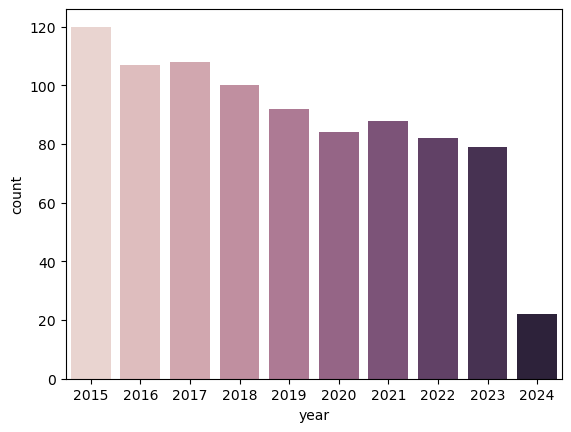

In [1178]:
sns.barplot(x='year', y='count', hue='year', data=since_2015_total_df,errorbar=None, legend = False)
plt.show()

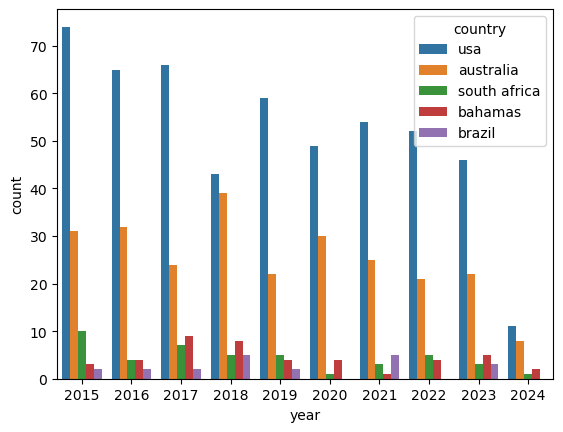

In [1020]:
sns.barplot(x='year', y='count', hue='country', data=since_2015_df, hue_order=top5_countries)
plt.show()

In [1046]:
injuries_df = last10top5_df.groupby(["injury"])['injury'].agg(['count'])
injuries_df

,count
injury,
fatal,53
injured,675
no-injury,145
unknown,9


array([<Axes: ylabel='count'>], dtype=object)

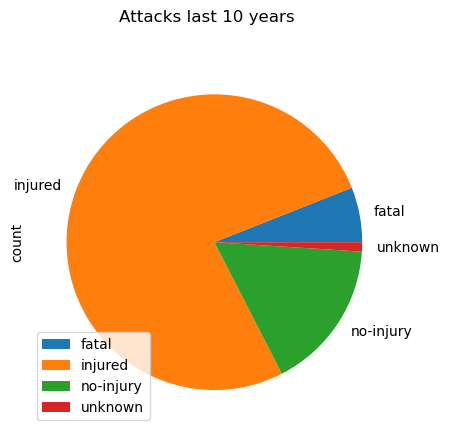

In [1132]:
injuries_df.plot.pie(subplots=True, title = "Attacks last 10 years")

In [1086]:
#sns.barplot(x='injury', y='count', hue='injury', data=injuries_df, errorbar=None)
#plt.show()

,count
injury,
fatal,12
injured,440
no-injury,64
unknown,3


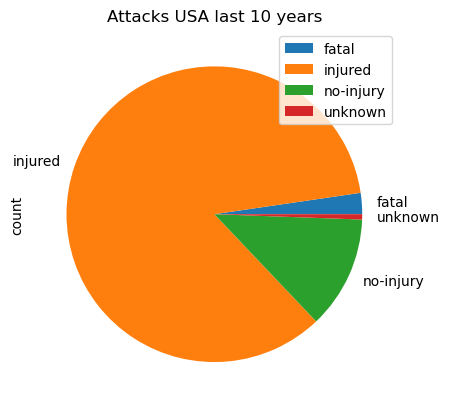

In [1180]:
last10_usa_df = last10top5_df[last10top5_df.country == "usa"]
injuries_usa_df = last10_usa_df.groupby(["injury"])['injury'].agg(['count'])
injuries_usa_df['count'].sum()
injuries_usa_df.plot.pie(y="count", title = "Attacks USA last 10 years")
injuries_usa_df

,count
injury,
fatal,26
injured,159
no-injury,65
unknown,4


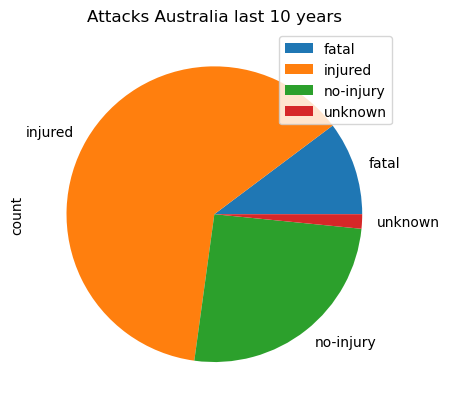

In [1134]:
last10_aus_df = last10top5_df[last10top5_df.country == "australia"]
injuries_aus_df = last10_aus_df.groupby(["injury"])['injury'].agg(['count'])
injuries_aus_df.plot.pie(y="count", title = "Attacks Australia last 10 years")
injuries_aus_df

In [1184]:
last10top2_df = final_df[(final_df["year"] >= 2015) & (final_df["year"] <= 2024) & (final_df["country"].isin(top2_countries))]

In [1230]:
since_2015_activities_df = last10top2_df.groupby([ "country", 'activity'])['activity'].agg(['count'])
since_2015_activities_df = since_2015_activities_df[since_2015_activities_df["count"] >= 35]
since_2015_activities_df.sort_values(by= ["country", "count"], ascending= False)

count
country   activity       
usa       surfing     169
          swimming    115
          fishing      65
australia surfing     107
          fishing      46
          swimming     36

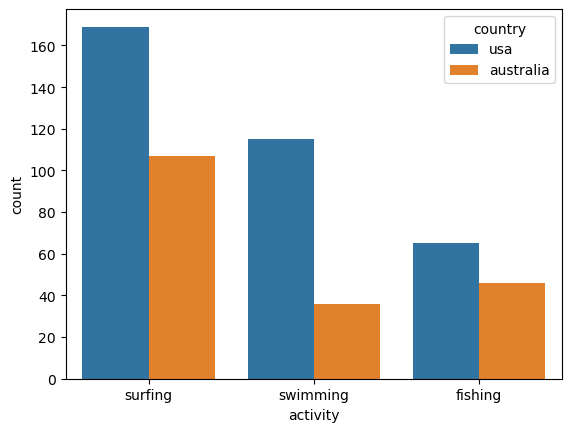

In [1238]:
sns.barplot(x='activity', y='count', hue='country', data=since_2015_activities_df,errorbar=None, order=["surfing", "swimming", "fishing"], hue_order=top2_countries)
plt.show()